In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data/fake.csv', index_col='uuid', dtype = {'title': str, 'text': str, 'main_img_url': str})

In [16]:
df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [17]:
df.columns

Index(['ord_in_thread', 'author', 'published', 'title', 'text', 'language',
       'crawled', 'site_url', 'country', 'domain_rank', 'thread_title',
       'spam_score', 'main_img_url', 'replies_count', 'participants_count',
       'likes', 'comments', 'shares', 'type'],
      dtype='object')

## Different types of fake news

In [18]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

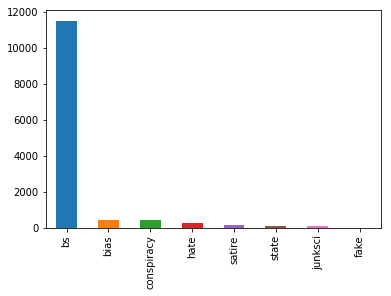

In [19]:
df['type'].value_counts().plot(kind='bar')

In [20]:
# filter by image url not NA
df = df.loc[df['main_img_url'].notnull()]    

In [21]:
def random_article_by_category(df, category):
    subset = df[df['type'] == category]
    #subset = subset.loc[subset['main_img_url'][-3:] == 'png']
    subset_uuids = subset.index
    chosen_uuid = np.random.choice(subset_uuids)
    #print(chosen_uuid)
    return get_article_by_uuid(df, chosen_uuid)

def get_article_by_uuid(df, uuid):
    row = df.loc[uuid]
    article = {}
    article['title'] = row.title
    article['text'] = row.text
    article['published'] = row.published
    article['site_url'] = row.site_url
    article['main_img_url'] = row.main_img_url

    return article

In [22]:
article = random_article_by_category(df, 'bs')
print(article['title'])
print(article['main_img_url'])
Image(url= article['main_img_url'], width=200, height=100)

Re: Americans Want Hillary in Jail - Rightly So!
http://freedomoutpost.com/wp-content/uploads/2016/10/hillary-jail.jpg


## Test

In [23]:
all_uuid = df.index.tolist()
all_image_url = df['main_img_url'].tolist()

In [24]:
filtered_ids = []
for i, url in enumerate(all_image_url):
    if str(url)[-3:]=='png':
        filtered_ids.append(all_uuid[i])

In [25]:
filtered_df = df.loc[filtered_ids]

In [26]:
article = random_article_by_category(filtered_df, 'bs')
print(article['main_img_url'])

http://i1.wp.com/www.counterpunch.org/wp-content/dropzone/2015/06/OGFB4.png


In [27]:
Image(url= article['main_img_url'], width=200, height=100)

In [28]:
import news_generator as news

In [29]:
df = news.get_news_df('fake.csv')

FileNotFoundError: File b'fake.csv' does not exist

In [12]:
article = news.get_random_article()
print(article['title'])
print(article['main_img_url'])
a=Image(url=article['main_img_url'], width=200, height=100)

News: Great News For Ketchup: Political Scientists Say That The Outcome Of The Presidential Election Will In No Way Affect Ketchup
http://images.onionstatic.com/clickhole/3429/9/16x9/1200.jpg


In [13]:
article = news.get_random_article()
while not(exists(article['main_img_url'])):
    article = news.get_random_article()
    print(article['main_img_url'])
print(article['title'])
print(article['main_img_url'])
a=Image(url=article['main_img_url'], width=200, height=100)
a

NameError: name 'exists' is not defined

In [ ]:
import requests

def exists(path):
    r = requests.head(path)
    return r.status_code == requests.codes.ok

print(exists(article['main_img_url']))

In [ ]:
len(df)

In [ ]:
all_uuid = df.index.tolist()
all_image_url = df['main_img_url'].tolist()
filtered_ids = []
for i, url in enumerate(all_image_url):
    if (exists(str(url))):
        print(url)
        filtered_ids.append(all_uuid[i])

In [ ]:
len(filtered_ids)

In [ ]:
import pickle
filename = 'filtered_ids.pkl'
with open(filename, 'wb') as f:
    pickle.dump([filtered_ids], f)

In [ ]:
filtered_df = df.loc[filtered_ids]

In [ ]:
filtered_df.to_csv('filtered_fake.csv')

In [ ]:
filtered_df = pd.read_csv('filtered_fake.csv', index_col='uuid', dtype = {'title': str, 'text': str, 'main_img_url': str})

In [ ]:
len(filtered_df)

In [ ]:
import numpy as np
np.random.randint(2,10)

In [32]:
parts = article['text'].split('\n')

In [37]:
foo = ('\n').join(parts[:2])

In [38]:
print(foo)

Email 
This month, the Pentagon admitted it has used uranium weapons in attacks inside Syria — violating its public promise last year that it would not use DU there, and contradicting the claim that US bombing is done in defense of the Syrian people, according to the Int’l Campaign to Ban Uranium Weapons . 


In [41]:
file_name = 'data/gold_dataset.csv'

In [6]:
import pandas as pd
df = pd.read_csv('data/foo.csv', index_col='uuid')

In [43]:
df


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/io/excel.py", line 352, in __init__
    import xlrd
ModuleNotFoundError: No module named 'xlrd'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-7053738172fc>", line 1, in <module>
    dfs = pd.read_excel(file_name, sheet_name='gold_dataset')
  File "/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/util/_decorators.py", line 178, in wrapper
    return func(*args, **kwargs)
  File "/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/util/_decorators.py", line 178, in wrapper
    return func(*args, **kwargs)
  File "/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site

TypeError: must be str, not list

In [3]:
import csv


In [5]:
with open("data/gold_dataset.csv", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    data = [r for r in reader]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 867: invalid continuation byte